In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:\\Users\\Sarthak Tyagi\\Downloads\\Bird Strikes data.xlsx - Bird Strikes.csv")

In [46]:
df.isnull().sum()

Record ID                                      0
Aircraft: Type                               129
Airport: Name                                129
Altitude bin                                 129
Aircraft: Make/Model                           0
Wildlife: Number struck                      129
Wildlife: Number Struck Actual                 0
Effect: Impact to flight                   23480
FlightDate                                   129
Effect: Indicated Damage                       0
Aircraft: Number of engines?                 267
Aircraft: Airline/Operator                   129
Origin State                                 449
When: Phase of flight                        129
Conditions: Precipitation                  23543
Remains of wildlife collected?                 0
Remains of wildlife sent to Smithsonian        0
Remarks                                     4771
Wildlife: Size                               129
Conditions: Sky                                0
Wildlife: Species   

In [10]:
# Group by 'Airport: Name' and sum the 'Wildlife: Number Struck Actual'
airport_strikes = df.groupby('Airport: Name')['Wildlife: Number Struck Actual'].sum().reset_index()

# Sort values for better visualization
airport_strikes = airport_strikes.sort_values(by='Wildlife: Number Struck Actual', ascending=False)

airport_strikes

,Airport: Name,Wildlife: Number Struck Actual
208,DALLAS/FORT WORTH INTL ARPT,2933
875,SACRAMENTO INTL,1856
530,LAGUARDIA NY,1579
783,PHILADELPHIA INTL,1396
882,SALT LAKE CITY INTL,1376
...,...,...
387,GRIFFING SANDUSKY ARPT,1
889,SAN SALVADOR INTL,1
612,MARIANNA MUNICIPAL ARPT,1
611,MARCO POLO INTL,1


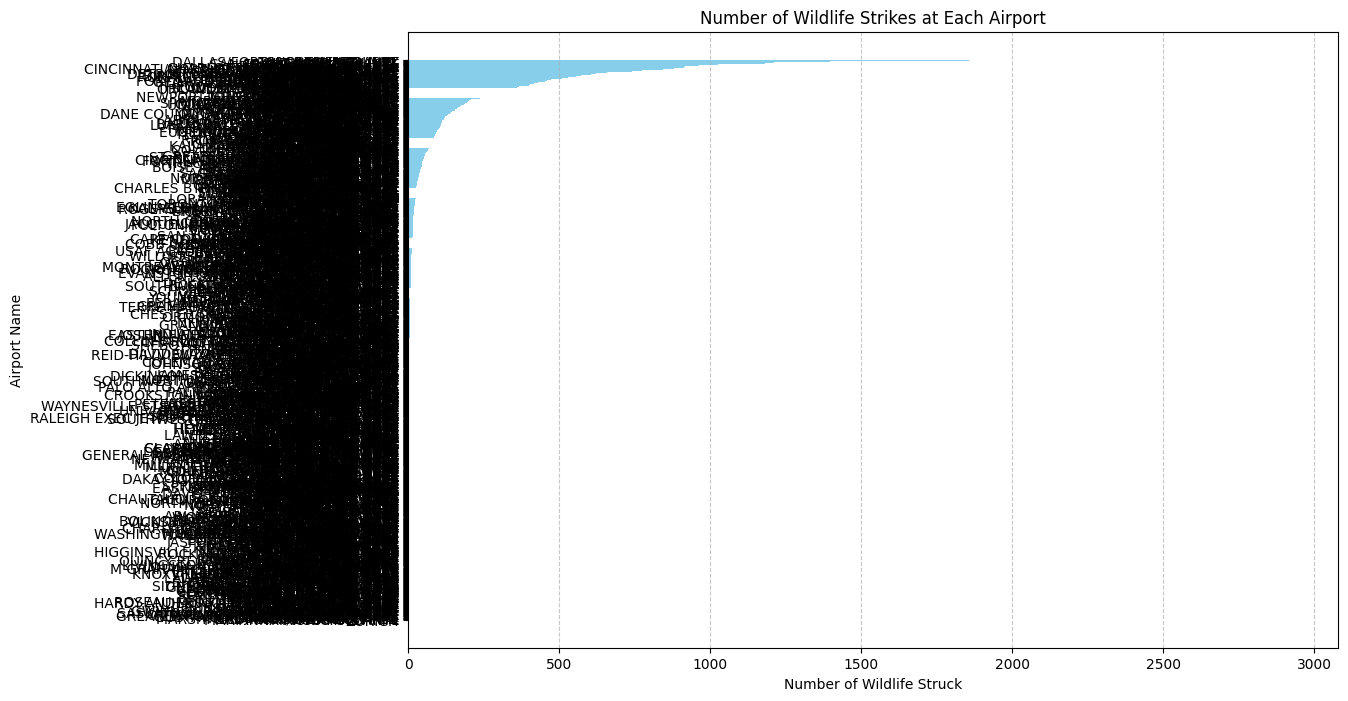

In [16]:
# Plotting
plt.figure(figsize=(12, 8))
plt.barh(airport_strikes['Airport: Name'], airport_strikes['Wildlife: Number Struck Actual'], color='skyblue')
plt.xlabel('Number of Wildlife Struck')
plt.ylabel('Airport Name')
plt.title('Number of Wildlife Strikes at Each Airport')
plt.gca().invert_yaxis()  # Highest values at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add gridlines


In [18]:
df['FlightDate'] = pd.to_datetime(df['FlightDate'], errors='coerce')

# Extract the year from the 'FlightDate'
df['Year'] = df['FlightDate'].dt.year

C:\Users\Sarthak Tyagi\AppData\Local\Temp\ipykernel_11256\3922030948.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['FlightDate'] = pd.to_datetime(df['FlightDate'], errors='coerce')


In [19]:
yearly_analysis = df.groupby('Year')['Wildlife: Number Struck Actual'].sum().reset_index()

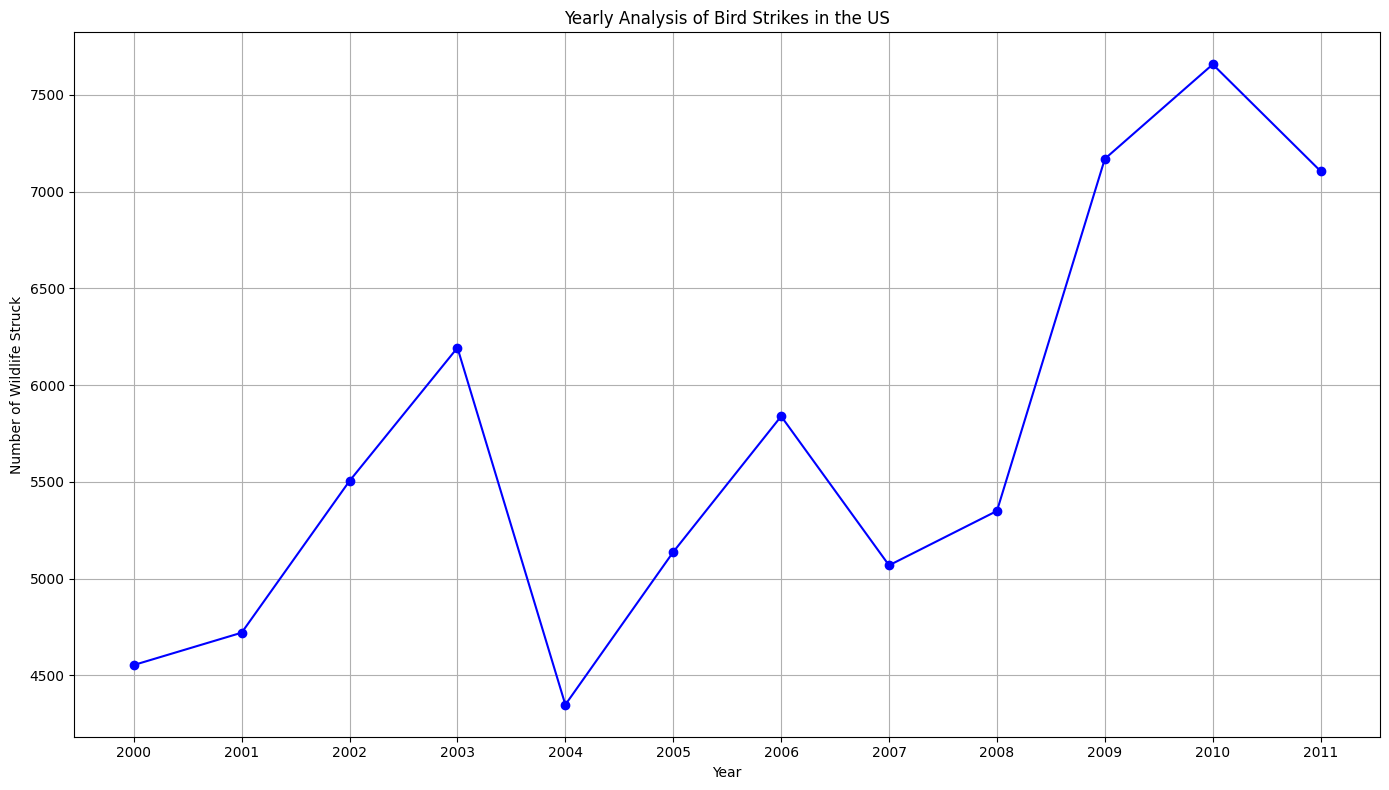

In [20]:
plt.figure(figsize=(14, 8))
plt.plot(yearly_analysis['Year'], yearly_analysis['Wildlife: Number Struck Actual'], marker='o', linestyle='-', color='b')
plt.xlabel('Year')
plt.ylabel('Number of Wildlife Struck')
plt.title('Yearly Analysis of Bird Strikes in the US')
plt.grid(True)

# Ensure all years are displayed on the x-axis
plt.xticks(yearly_analysis['Year'])
plt.tight_layout()

plt.show()

In [22]:
# Group by 'Airline' and sum the 'Wildlife: Number Struck Actual'
airline_strikes = df.groupby('Aircraft: Make/Model')['Wildlife: Number Struck Actual'].sum().reset_index()

# Sort by number of strikes in descending order and get the top 10 airlines
top_airlines = airline_strikes.sort_values(by='Wildlife: Number Struck Actual', ascending=False).head(10)

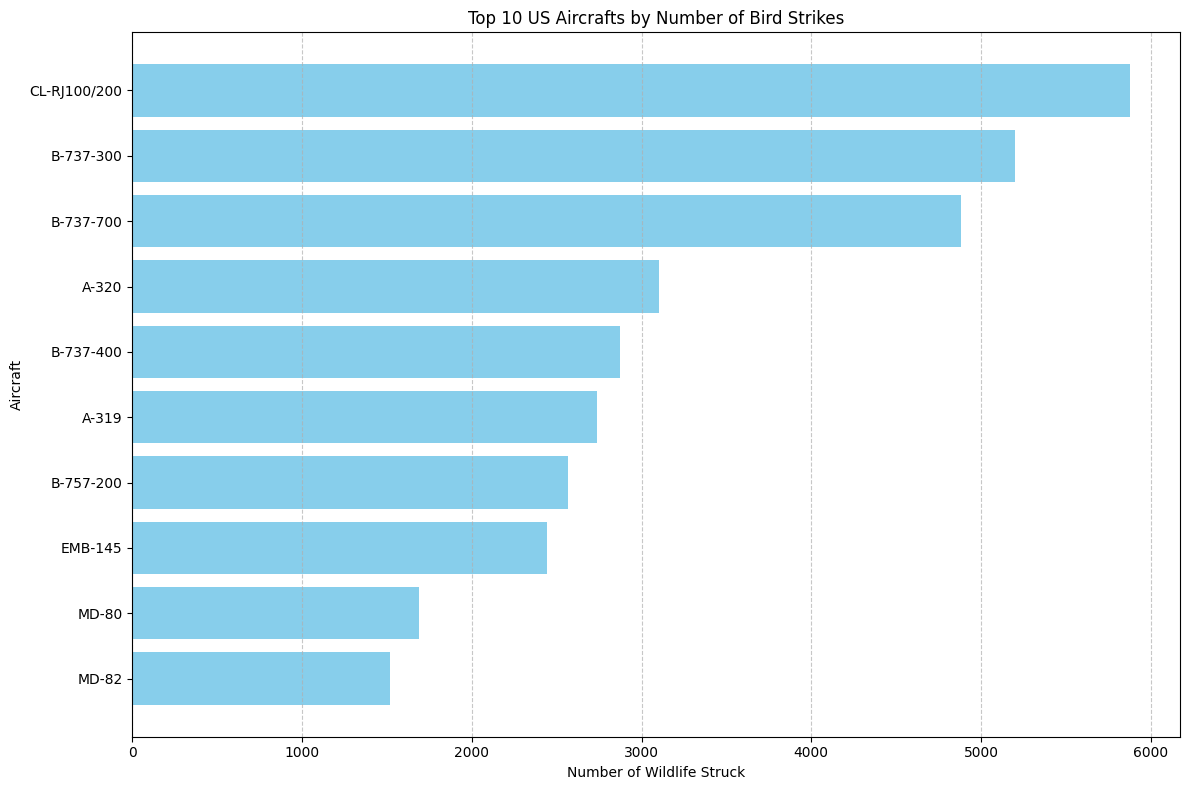

In [23]:
# Plotting
plt.figure(figsize=(12, 8))
plt.barh(top_airlines['Aircraft: Make/Model'], top_airlines['Wildlife: Number Struck Actual'], color='skyblue')
plt.xlabel('Number of Wildlife Struck')
plt.ylabel('Aircraft')
plt.title('Top 10 US Aircrafts by Number of Bird Strikes')
plt.gca().invert_yaxis()  # Highest values at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [33]:
df['FlightDate'] = pd.to_datetime(df['FlightDate'], errors='coerce')

# Extract month and year from 'FlightDate'
df['Month'] = df['FlightDate'].dt.month
df['Year'] = df['FlightDate'].dt.year

In [34]:
monthly_analysis = df.groupby('Month')['Wildlife: Number Struck Actual'].sum().reset_index()


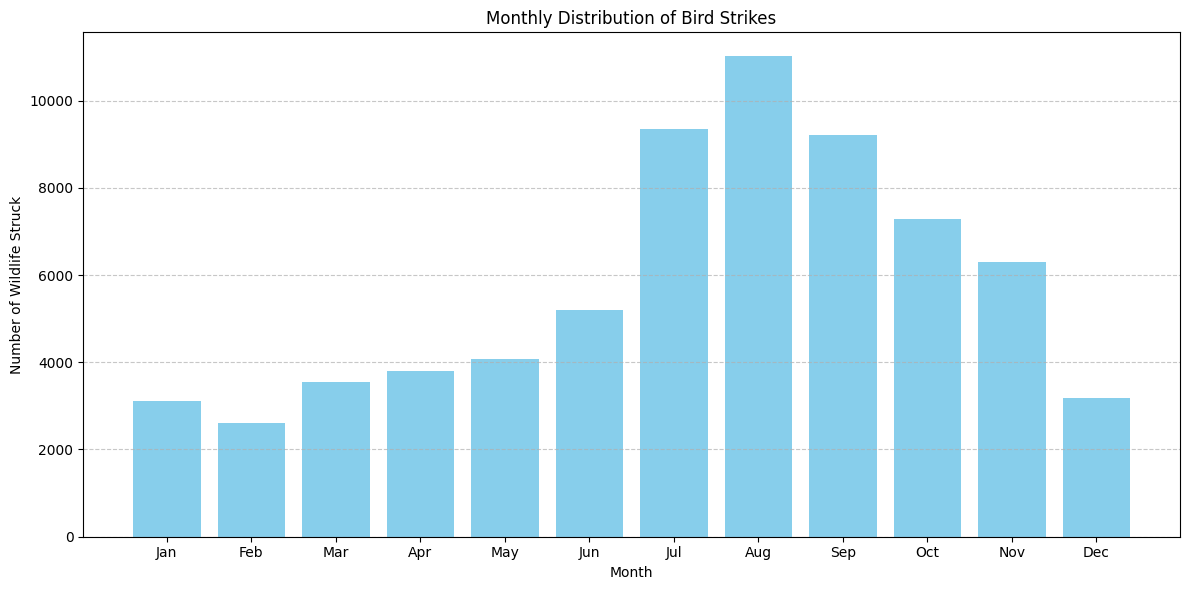

In [35]:
plt.figure(figsize=(12, 6))
plt.bar(monthly_analysis['Month'], monthly_analysis['Wildlife: Number Struck Actual'], color='skyblue')
plt.xlabel('Month')
plt.ylabel('Number of Wildlife Struck')
plt.title('Monthly Distribution of Bird Strikes')
plt.xticks(monthly_analysis['Month'], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

In [39]:
df['Feet above ground'] = pd.to_numeric(df['Feet above ground'], errors='coerce')

# Group by 'Feet above ground' and 'Effect: Impact to flight', and count occurrences
impact_analysis = df.groupby(['Feet above ground', 'Effect: Impact to flight']).size().reset_index(name='Count')

# Pivot the data to have altitudes as rows and impact types as columns
impact_pivot = impact_analysis.pivot(index='Feet above ground', columns='Effect: Impact to flight', values='Count').fillna(0)

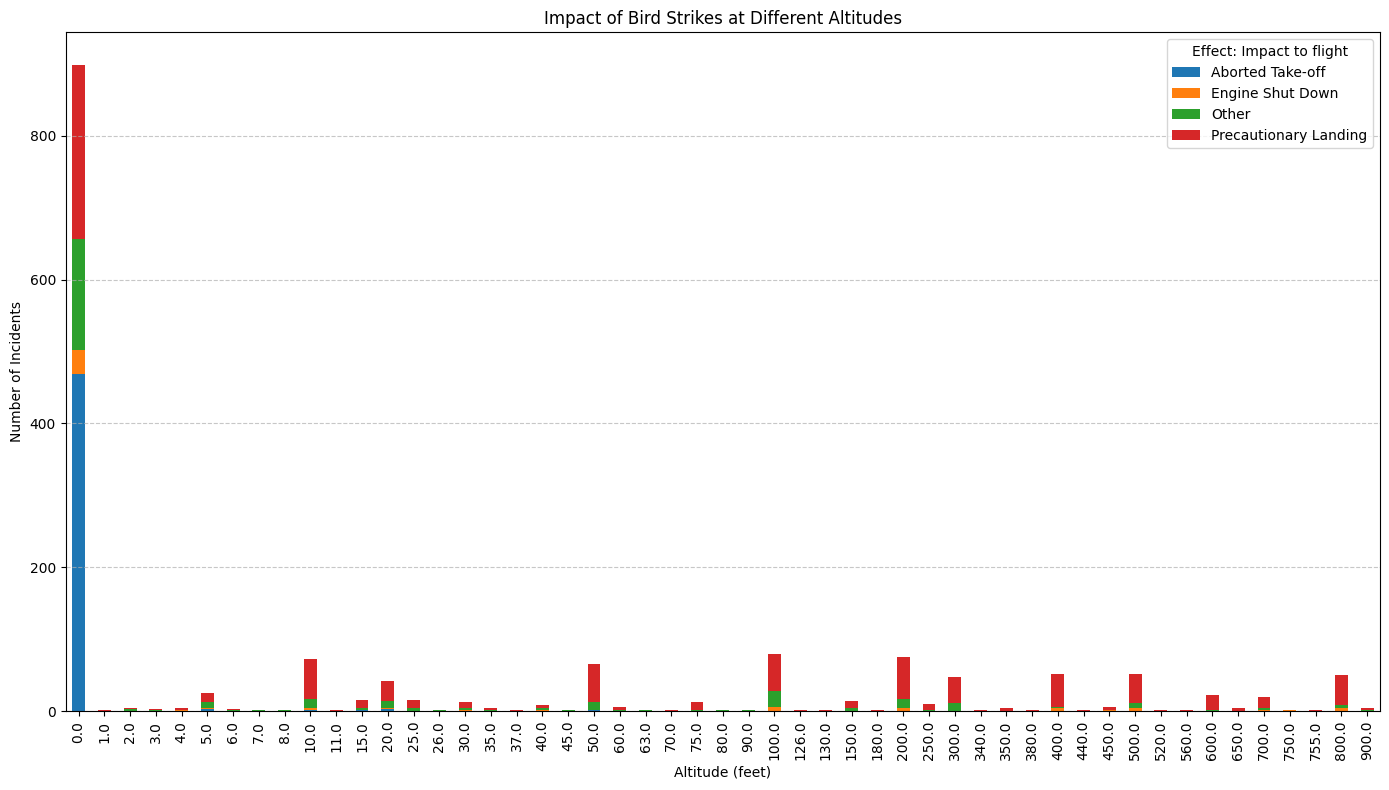

In [40]:
impact_pivot.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.xlabel('Altitude (feet)')
plt.ylabel('Number of Incidents')
plt.title('Impact of Bird Strikes at Different Altitudes')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

In [41]:
df['FlightDate'] = pd.to_datetime(df['FlightDate'], errors='coerce')

# Extract the year from 'FlightDate'
df['Year'] = df['FlightDate'].dt.year

# Ensure the 'Cost: Total' column is numeric
df['Cost: Total $'] = pd.to_numeric(df['Cost: Total $'], errors='coerce')

In [42]:
yearly_cost = df.groupby('Year')['Cost: Total $'].sum().reset_index()

In [44]:
yearly_cost

,Year,Cost: Total $
0,2000.0,2626.0
1,2001.0,4301.0
2,2002.0,4735.0
3,2003.0,3809.0
4,2004.0,7126.0
5,2005.0,6551.0
6,2006.0,8107.0
7,2007.0,10345.0
8,2008.0,14020.0
9,2009.0,15265.0
